Dataset cargado: 387 filas × 96 columnas

Primeras filas:
        fecha                  pilot           glider competition_id  \
0  2024-01-08         Miguel Serrano           ASW-20             AJ   
1  2024-01-08  Miguel Angel  Serrano  401 Kestrel 19m             AT   
2  2024-01-12                Unknown          Unknown            NaN   
3  2024-01-12  Miguel Angel  Serrano  401 Kestrel 19m             AT   
4  2024-01-13                Unknown       Jantar St2            NaN   

   altura_max_m  altura_min_m  altura_despegue_m  altura_aterrizaje_m  \
0          1282            98                107                  101   
1          1348           111                114                  117   
2          1471           110                111                  111   
3          1262           115                127                  126   
4          1436            86                114                   86   

   ganancia_altura_m  rango_altura_m  duracion_min  duracion_horas  \


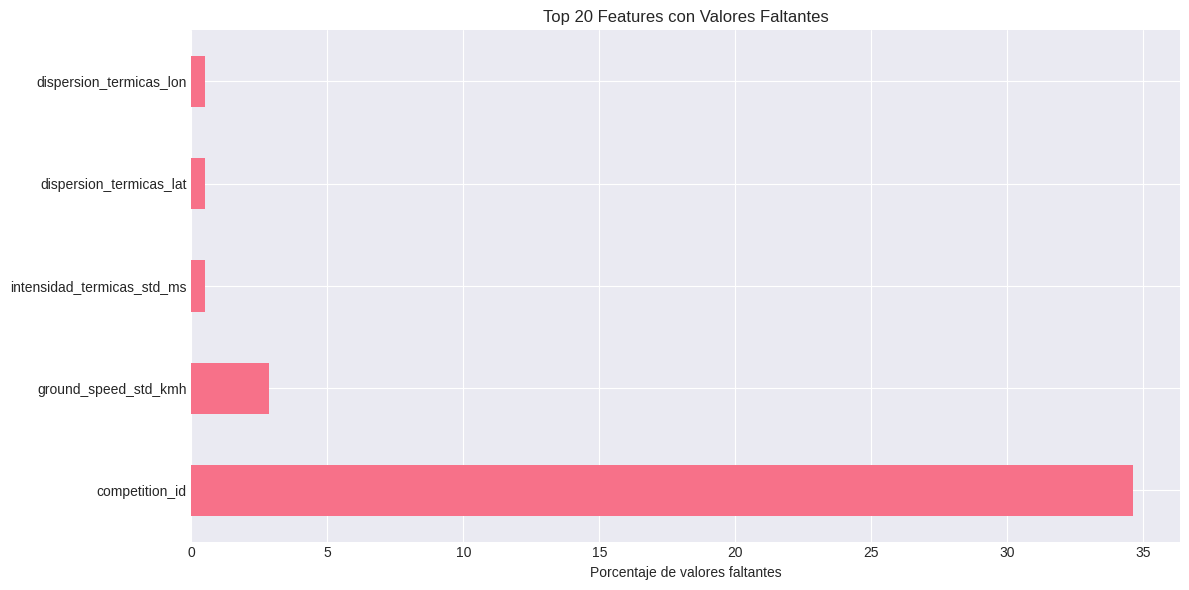

TARGETS DEL PROYECTO:

Regresión: ['altura_max_m', 'duracion_min', 'distancia_km']
Clasificación: calidad_dia

ESTADÍSTICAS DESCRIPTIVAS - TARGETS DE REGRESIÓN
       altura_max_m  duracion_min  distancia_km
count       387.000       387.000       387.000
mean       2231.612       197.438       394.185
std        3417.991        72.812       171.899
min         560.000        12.300        12.100
25%        1702.000       156.550       284.750
50%        2009.000       202.000       395.100
75%        2279.000       240.900       504.700
max       64500.000       404.200       899.000

DISTRIBUCIÓN - TARGET DE CLASIFICACIÓN

calidad_dia:
calidad_dia
Bueno        248
Excelente     69
Malo          10
Regular       60
Name: count, dtype: int64

Porcentajes:
calidad_dia
Bueno       64.083
Excelente   17.829
Malo         2.584
Regular     15.504
Name: proportion, dtype: float64


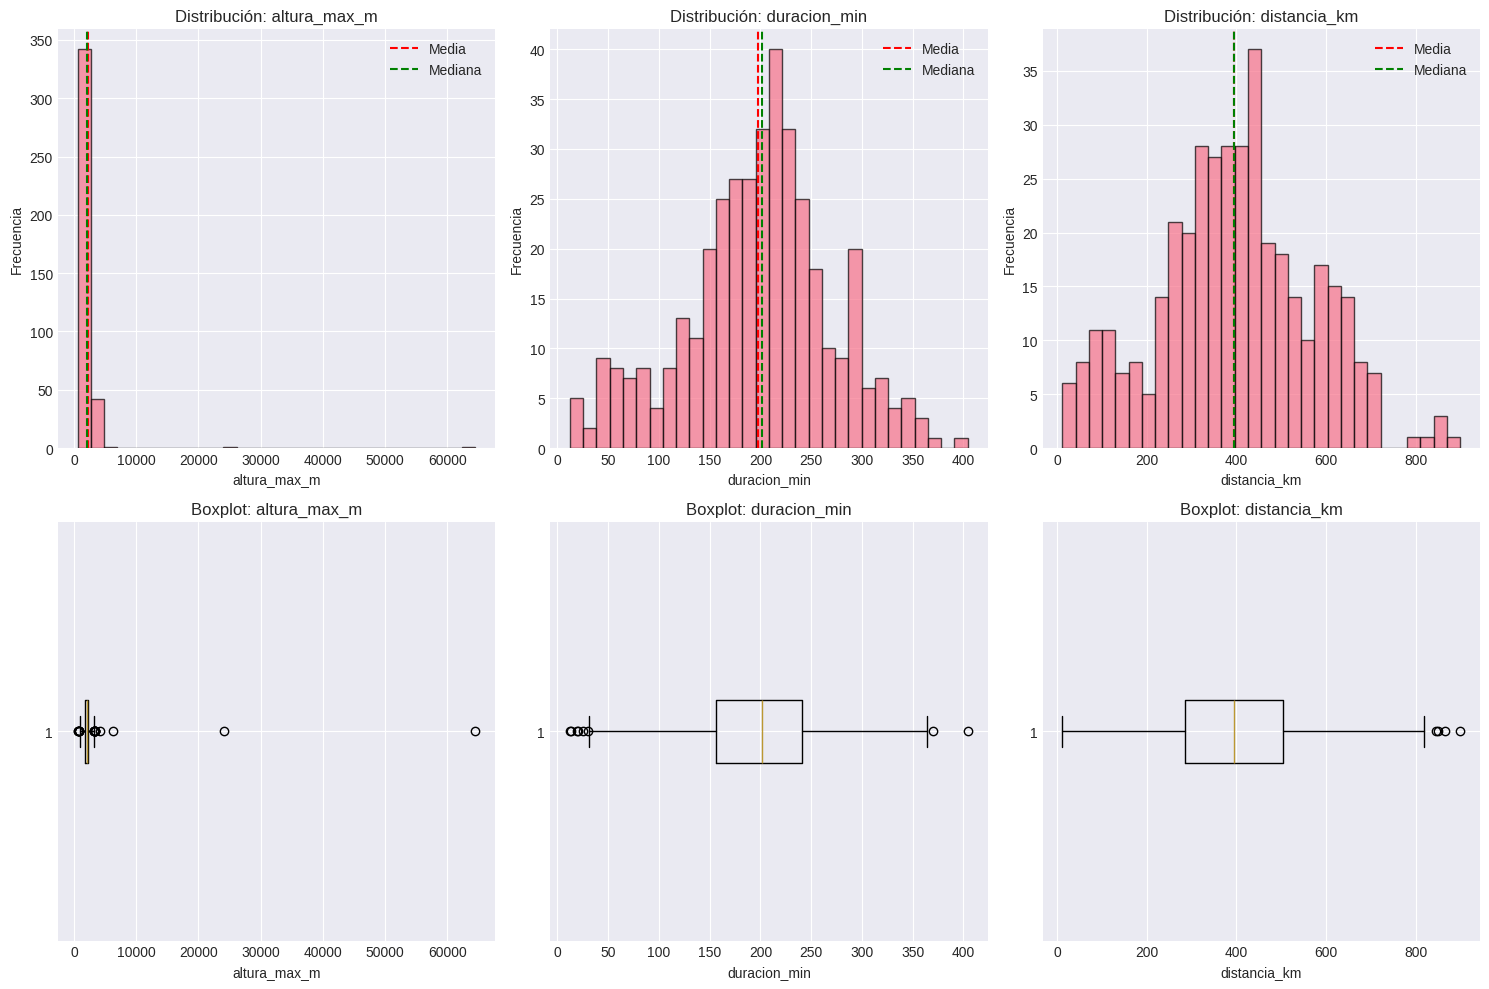


TEST DE NORMALIDAD (Shapiro-Wilk):
Si p-value < 0.05, rechazamos H0 (NO es normal)

altura_max_m: p-value=0.0000 → NO normal
duracion_min: p-value=0.0020 → NO normal
distancia_km: p-value=0.0125 → NO normal
Features meteorológicas: 14
       temp_2m_max  temp_2m_min  temp_2m_mean  temp_differential  \
count      387.000      387.000       387.000            387.000   
mean        35.306       10.980        22.999             24.325   
std          5.190        4.869         4.407              2.709   
min         15.045       -5.126         6.554             17.208   
25%         33.320        8.981        21.724             22.886   
50%         36.873       11.491        24.047             23.888   
75%         38.616       13.919        25.505             25.991   
max         44.049       19.285        28.875             32.545   

       solar_rad_total  solar_rad_max  cape_max  cape_mean  \
count          387.000        387.000   387.000    387.000   
mean       7316642.880     

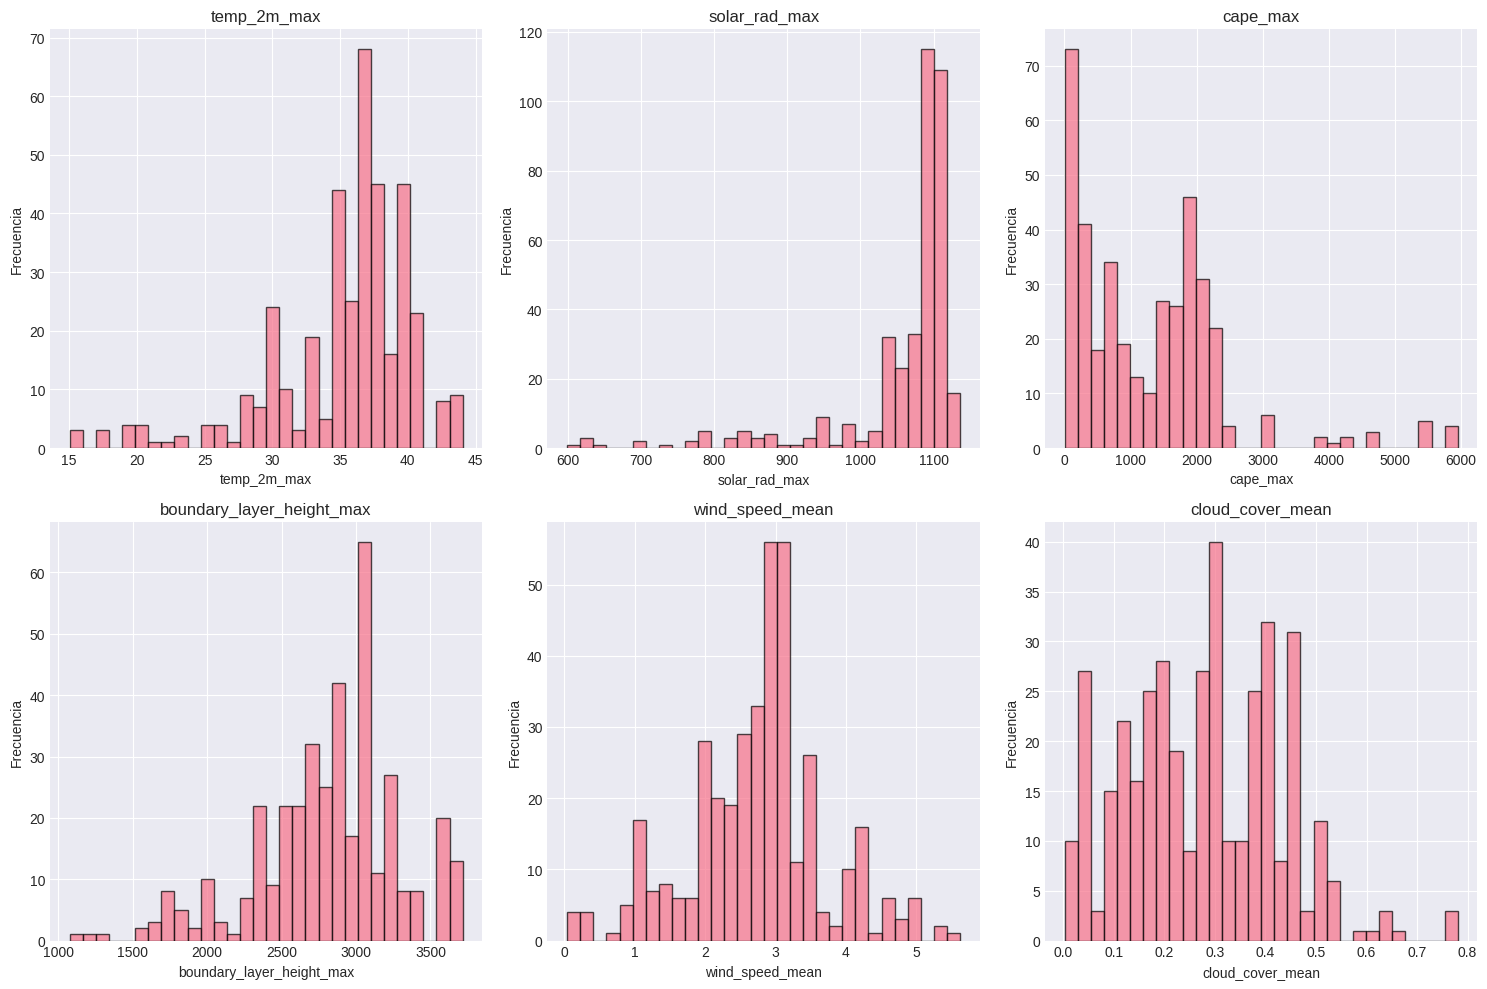

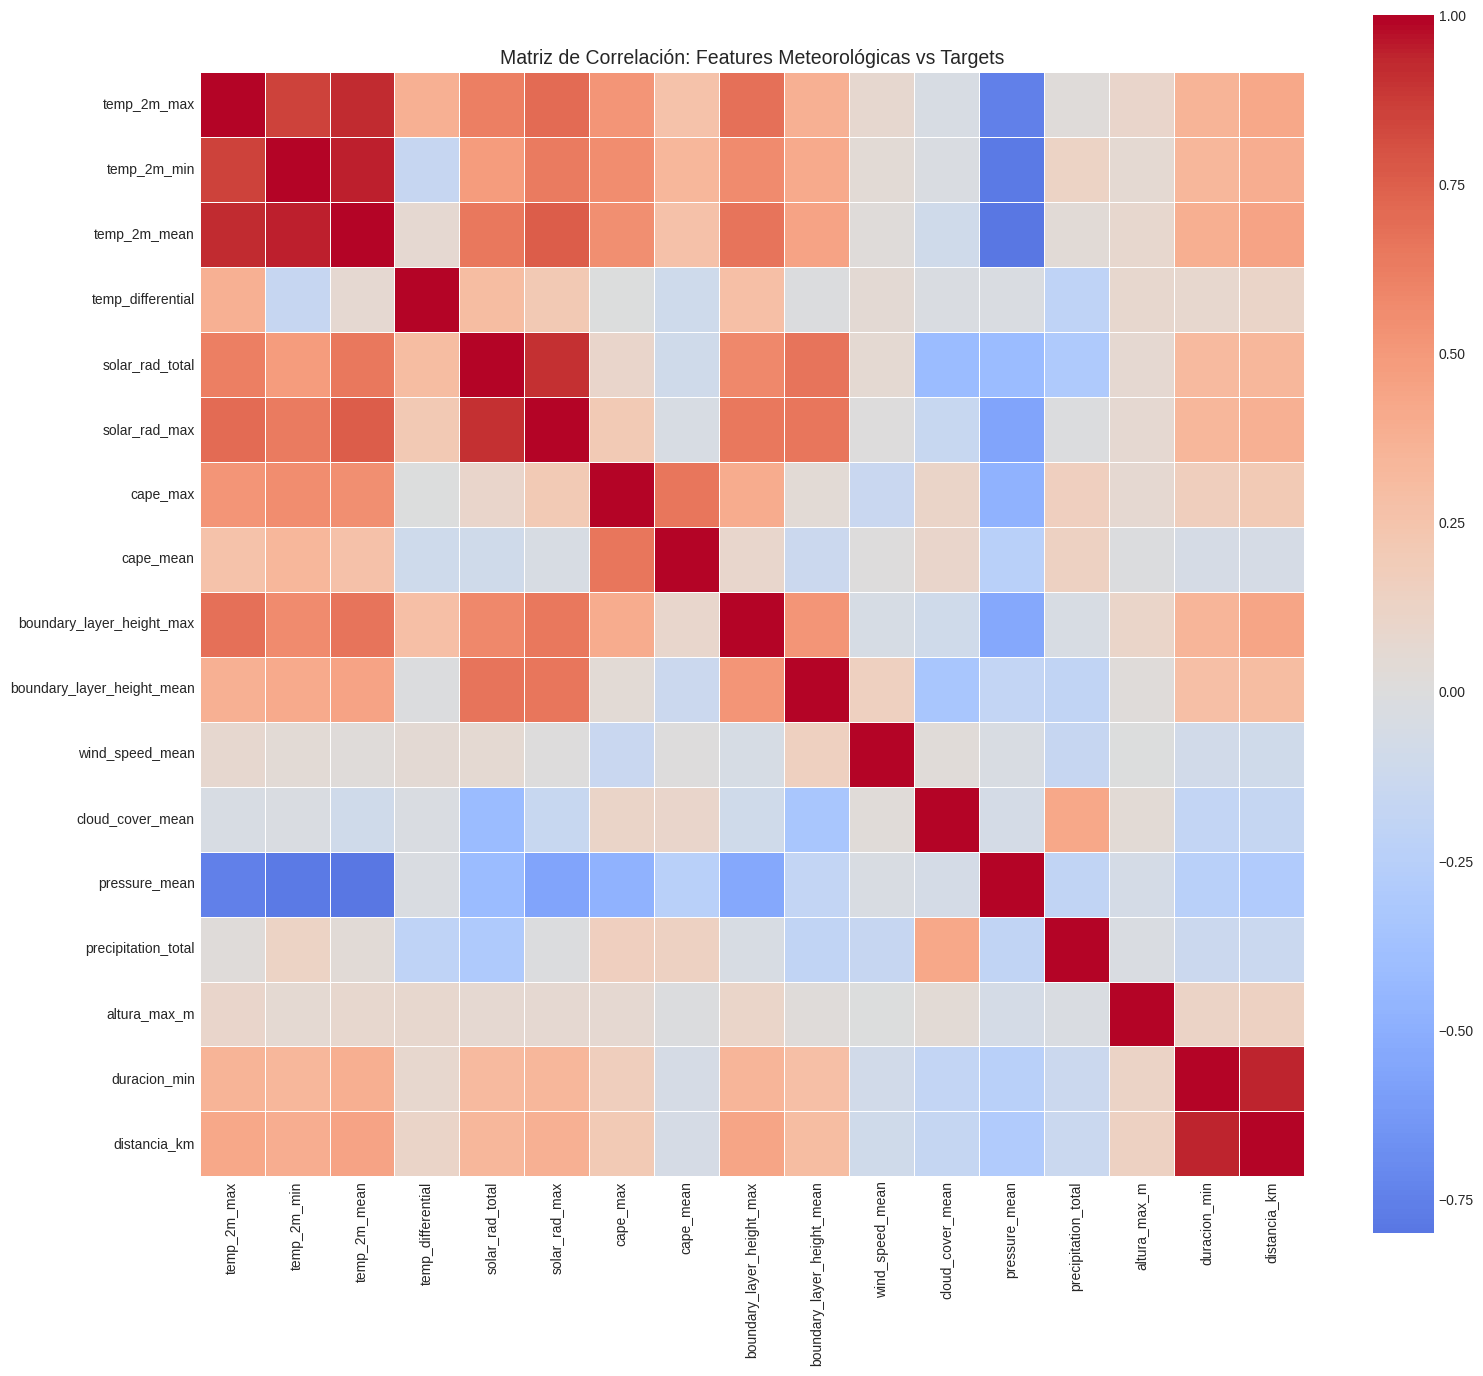


TOP CORRELACIONES CON TARGETS

altura_max_m:

Top 10 correlaciones positivas:
distancia_km                0.145
duracion_min                0.125
boundary_layer_height_max   0.106
temp_2m_max                 0.095
temp_2m_mean                0.085
temp_differential           0.079
solar_rad_max               0.069
cape_max                    0.068
solar_rad_total             0.067
temp_2m_min                 0.058
Name: altura_max_m, dtype: float64

duracion_min:

Top 10 correlaciones positivas:
distancia_km                 0.939
temp_2m_mean                 0.383
temp_2m_max                  0.356
boundary_layer_height_max    0.347
solar_rad_max                0.341
temp_2m_min                  0.335
solar_rad_total              0.312
boundary_layer_height_mean   0.285
cape_max                     0.164
altura_max_m                 0.125
Name: duracion_min, dtype: float64

distancia_km:

Top 10 correlaciones positivas:
duracion_min                 0.939
temp_2m_mean                 0

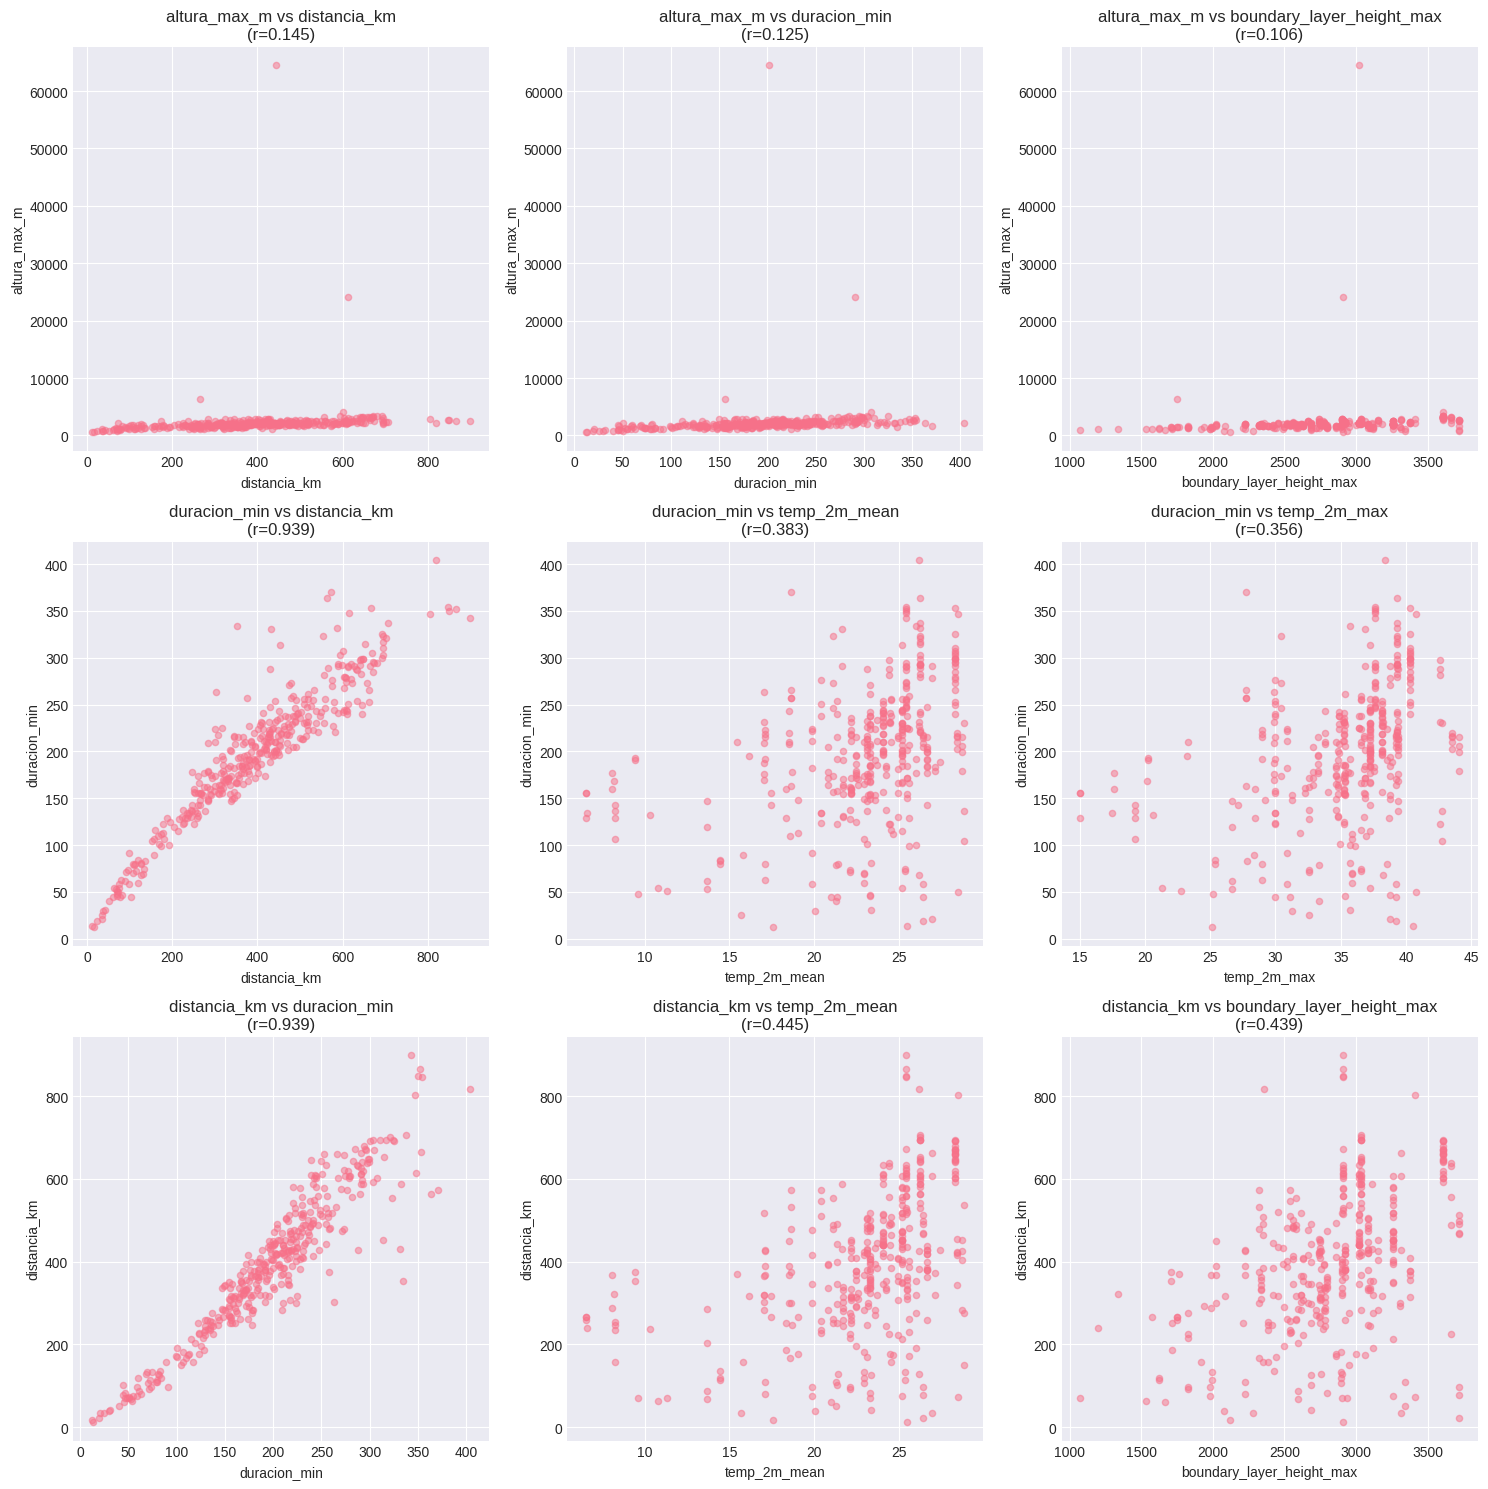

DETECCIÓN DE OUTLIERS (método IQR)

altura_max_m:
  Outliers: 20 (5.17%)
  Límites: [836.50, 3144.50]

duracion_min:
  Outliers: 8 (2.07%)
  Límites: [30.03, 367.43]

distancia_km:
  Outliers: 4 (1.03%)
  Límites: [-45.17, 834.62]


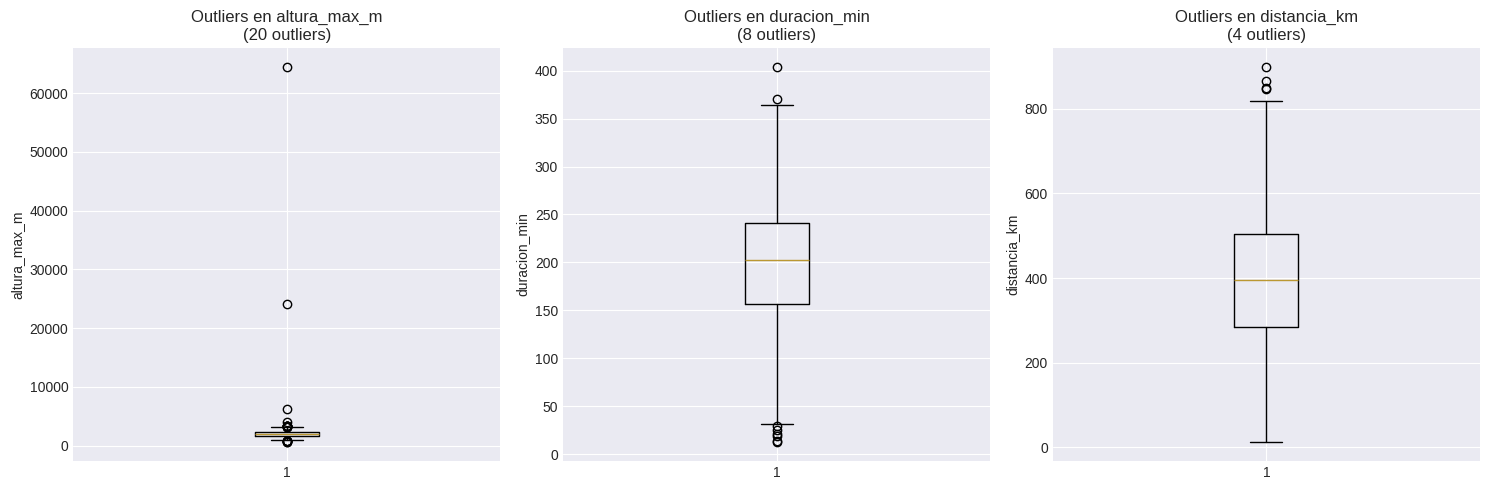

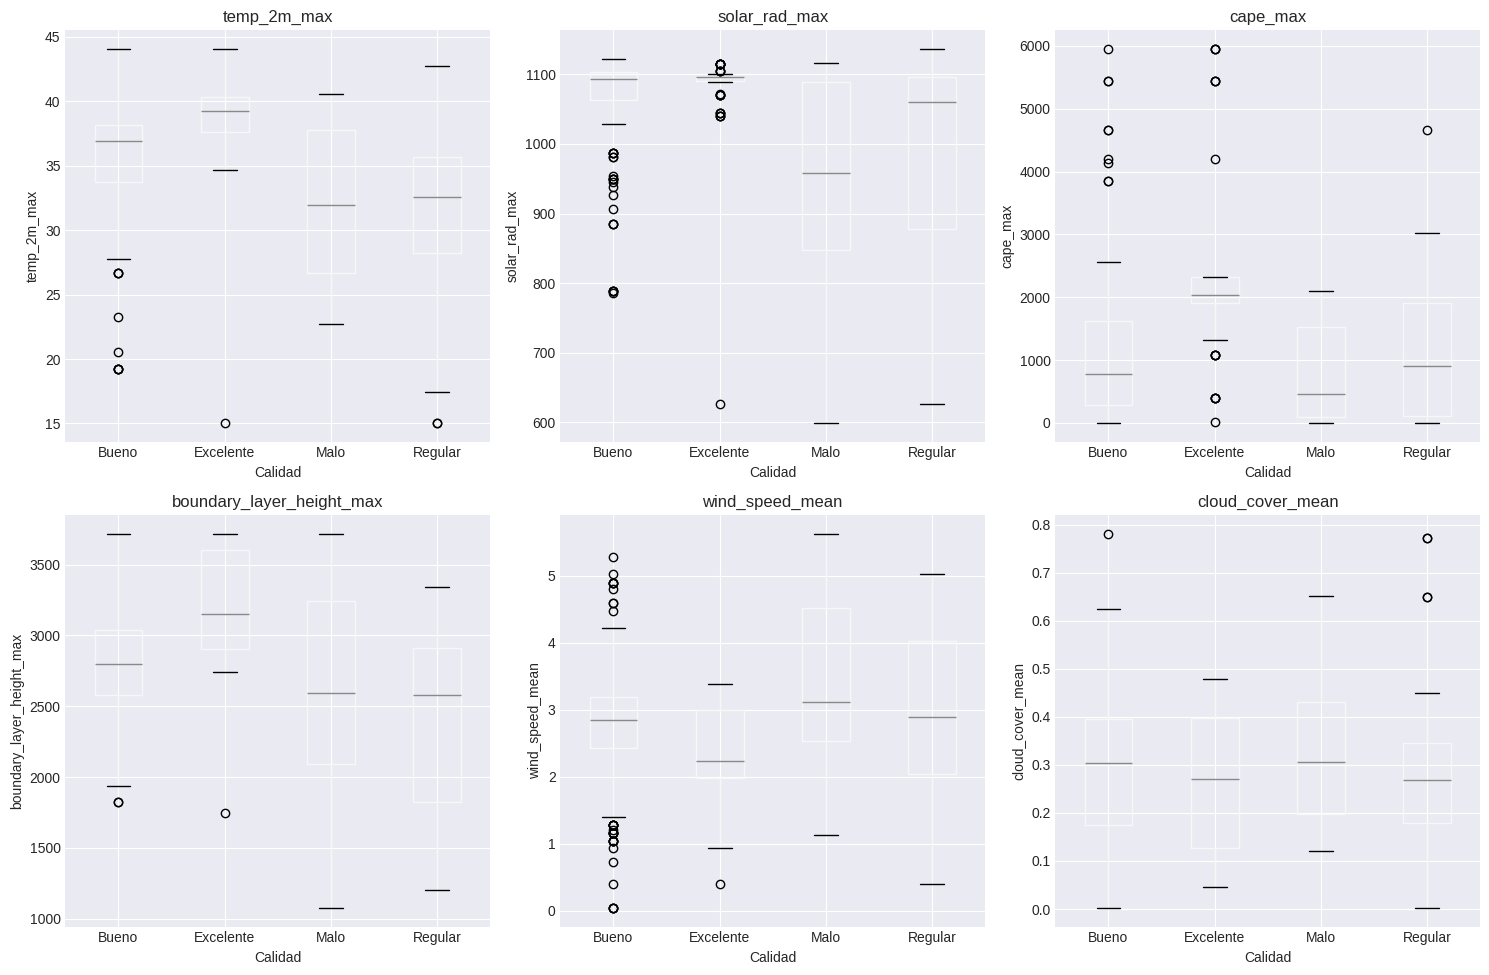

SPLIT ESTRATIFICADO 80/20

Dataset para split: 387 filas

Distribución original:
calidad_dia
Bueno       0.641
Excelente   0.178
Malo        0.026
Regular     0.155
Name: proportion, dtype: float64

✓ Train: 309 (79.8%)
✓ Val: 78 (20.2%)

Distribución en Train:
calidad_dia
Bueno       0.641
Excelente   0.178
Malo        0.026
Regular     0.155
Name: proportion, dtype: float64

Distribución en Val:
calidad_dia
Bueno       0.641
Excelente   0.179
Malo        0.026
Regular     0.154
Name: proportion, dtype: float64
TRATAMIENTO DE VALORES FALTANTES

✓ Columnas eliminadas: 0
✓ Valores imputados: 5

TRATAMIENTO DE OUTLIERS (Winsorización)

✓ Features procesadas: 87
✓ Modificados en train: 567
✓ Modificados en val: 153

CODIFICACIÓN DE CATEGÓRICAS

Categóricas a codificar: 8
['fecha', 'pilot', 'glider', 'competition_id', 'hora_despegue', 'filename', 'flight_id', 'fecha_dt']

✓ Nuevas columnas: 1063

NORMALIZACIÓN (RobustScaler)

Features a escalar: 84
Aviso: 20 valores infinitos en train_enco

In [3]:
# %% [markdown]
# # Proyecto Final - Machine Learning
# ## Parte 1: Análisis Exploratorio y Preprocesamiento
# 
# **Objetivo**: Predecir características de vuelo a vela basándose en condiciones meteorológicas

# %%
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
import os
warnings.filterwarnings('ignore')

# Importar módulo de preprocesamiento
from preprocessing import PreprocessingPipeline, detect_outliers_iqr

# Configuración visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configuración pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

# Crear directorios
os.makedirs('data/processed', exist_ok=True)
os.makedirs('visualizaciones', exist_ok=True)

# %% [markdown]
# ## 1. Carga de Datos

# %%
df = pd.read_csv('data/processed/dataset_completo.csv')
print(f"Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nPrimeras filas:")
print(df.head())

# %%
print("=" * 70)
print("INFORMACIÓN DEL DATASET")
print("=" * 70)
df.info()

# %%
features_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
features_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"Features numéricas: {len(features_numericas)}")
print(f"Features categóricas: {len(features_categoricas)}")
print(f"\nCategóricas: {features_categoricas}")

# %% [markdown]
# ## 2. Análisis de Valores Faltantes

# %%
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Missing', ascending=False)

missing_df = missing_df[missing_df['Missing'] > 0]

if len(missing_df) > 0:
    print(f"Columnas con valores faltantes: {len(missing_df)}\n")
    print(missing_df.head(20))
    
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_df['Percentage'].head(20).plot(kind='barh', ax=ax)
    ax.set_xlabel('Porcentaje de valores faltantes')
    ax.set_title('Top 20 Features con Valores Faltantes')
    plt.tight_layout()
    plt.savefig('visualizaciones/valores_faltantes.png', dpi=150)
    plt.show()
else:
    print("✓ No hay valores faltantes")

# %% [markdown]
# ## 3. Análisis de Variables Objetivo (Targets)

# %%
targets_regresion = ['altura_max_m', 'duracion_min', 'distancia_km']
target_clasificacion = 'calidad_dia'

print("TARGETS DEL PROYECTO:")
print(f"\nRegresión: {targets_regresion}")
print(f"Clasificación: {target_clasificacion}")

# %%
print("\n" + "="*70)
print("ESTADÍSTICAS DESCRIPTIVAS - TARGETS DE REGRESIÓN")
print("="*70)
print(df[targets_regresion].describe())

# %%
if target_clasificacion in df.columns:
    print("\n" + "="*70)
    print("DISTRIBUCIÓN - TARGET DE CLASIFICACIÓN")
    print("="*70)
    print(f"\n{target_clasificacion}:")
    print(df[target_clasificacion].value_counts().sort_index())
    print(f"\nPorcentajes:")
    print(df[target_clasificacion].value_counts(normalize=True).sort_index() * 100)

# %%
# Visualización distribuciones de targets
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, target in enumerate(targets_regresion):
    # Histograma
    axes[i].hist(df[target].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(target)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(f'Distribución: {target}')
    axes[i].axvline(df[target].mean(), color='red', linestyle='--', label='Media')
    axes[i].axvline(df[target].median(), color='green', linestyle='--', label='Mediana')
    axes[i].legend()
    
    # Boxplot
    axes[i+3].boxplot(df[target].dropna(), vert=False)
    axes[i+3].set_xlabel(target)
    axes[i+3].set_title(f'Boxplot: {target}')

plt.tight_layout()
plt.savefig('visualizaciones/01_distribucion_targets.png', dpi=150)
plt.show()

# %%
print("\nTEST DE NORMALIDAD (Shapiro-Wilk):")
print("Si p-value < 0.05, rechazamos H0 (NO es normal)\n")

for target in targets_regresion:
    sample = df[target].dropna().sample(min(5000, len(df[target].dropna())))
    stat, p_value = stats.shapiro(sample)
    print(f"{target}: p-value={p_value:.4f} → {'NO normal' if p_value < 0.05 else 'Normal'}")

# %% [markdown]
# ## 4. Análisis de Variables Meteorológicas

# %%
features_meteo = [
    'temp_2m_max', 'temp_2m_min', 'temp_2m_mean', 'temp_differential',
    'solar_rad_total', 'solar_rad_max',
    'cape_max', 'cape_mean',
    'boundary_layer_height_max', 'boundary_layer_height_mean',
    'wind_speed_mean', 'cloud_cover_mean', 'pressure_mean', 'precipitation_total'
]
features_meteo = [f for f in features_meteo if f in df.columns]

print(f"Features meteorológicas: {len(features_meteo)}")
print(df[features_meteo].describe())

# %%
features_clave = ['temp_2m_max', 'solar_rad_max', 'cape_max', 
                  'boundary_layer_height_max', 'wind_speed_mean', 'cloud_cover_mean']
features_clave = [f for f in features_clave if f in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_clave[:6]):
    axes[i].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(feature)

plt.tight_layout()
plt.savefig('visualizaciones/02_distribucion_meteo.png', dpi=150)
plt.show()

# %% [markdown]
# ## 5. Análisis de Correlaciones

# %%
features_para_corr = features_meteo + targets_regresion
features_para_corr = [f for f in features_para_corr if f in df.columns]

corr_matrix = df[features_para_corr].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación: Features Meteorológicas vs Targets', fontsize=14)
plt.tight_layout()
plt.savefig('visualizaciones/03_matriz_correlacion.png', dpi=150)
plt.show()

# %%
print("\n" + "="*70)
print("TOP CORRELACIONES CON TARGETS")
print("="*70)

for target in targets_regresion:
    print(f"\n{target}:")
    corr_target = corr_matrix[target].drop(target).sort_values(ascending=False)
    print("\nTop 10 correlaciones positivas:")
    print(corr_target.head(10))

# %%
# Scatter plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

idx = 0
for target in targets_regresion:
    top_features = corr_matrix[target].drop(target).abs().sort_values(ascending=False).head(3).index
    
    for feature in top_features:
        if idx < 9:
            axes[idx].scatter(df[feature], df[target], alpha=0.5, s=20)
            axes[idx].set_xlabel(feature)
            axes[idx].set_ylabel(target)
            axes[idx].set_title(f'{target} vs {feature}\n(r={corr_matrix.loc[target, feature]:.3f})')
            idx += 1

plt.tight_layout()
plt.savefig('visualizaciones/04_scatter_correlaciones.png', dpi=150)
plt.show()

# %% [markdown]
# ## 6. Detección de Outliers

# %%
print("="*70)
print("DETECCIÓN DE OUTLIERS (método IQR)")
print("="*70)

outliers_info = {}

for target in targets_regresion:
    outliers, lower, upper = detect_outliers_iqr(df, target)
    outliers_info[target] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    
    print(f"\n{target}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Límites: [{lower:.2f}, {upper:.2f}]")

# %%
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, target in enumerate(targets_regresion):
    axes[i].boxplot(df[target].dropna())
    axes[i].set_ylabel(target)
    axes[i].set_title(f'Outliers en {target}\n({outliers_info[target]["count"]} outliers)')

plt.tight_layout()
plt.savefig('visualizaciones/05_outliers.png', dpi=150)
plt.show()

# %% [markdown]
# ## 7. Análisis por Calidad de Día

# %%
if target_clasificacion in df.columns:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    features_comparar = ['temp_2m_max', 'solar_rad_max', 'cape_max',
                         'boundary_layer_height_max', 'wind_speed_mean', 'cloud_cover_mean']
    features_comparar = [f for f in features_comparar if f in df.columns]
    
    for i, feature in enumerate(features_comparar[:6]):
        df.boxplot(column=feature, by=target_clasificacion, ax=axes[i])
        axes[i].set_xlabel('Calidad')
        axes[i].set_ylabel(feature)
        axes[i].set_title(feature)
    
    plt.suptitle('')
    plt.tight_layout()
    plt.savefig('visualizaciones/06_comparacion_por_calidad.png', dpi=150)
    plt.show()

# %% [markdown]
# ## 8. Split Estratificado (80% Train / 20% Val)

# %%
print("="*70)
print("SPLIT ESTRATIFICADO 80/20")
print("="*70)

df_split = df.dropna(subset=[target_clasificacion])

print(f"\nDataset para split: {len(df_split)} filas")
print(f"\nDistribución original:")
print(df_split[target_clasificacion].value_counts(normalize=True).sort_index())

train_data, val_data = train_test_split(
    df_split,
    test_size=0.2,
    stratify=df_split[target_clasificacion],
    random_state=42
)

print(f"\n✓ Train: {len(train_data)} ({len(train_data)/len(df_split)*100:.1f}%)")
print(f"✓ Val: {len(val_data)} ({len(val_data)/len(df_split)*100:.1f}%)")

print(f"\nDistribución en Train:")
print(train_data[target_clasificacion].value_counts(normalize=True).sort_index())
print(f"\nDistribución en Val:")
print(val_data[target_clasificacion].value_counts(normalize=True).sort_index())

# %% [markdown]
# ## 9. Preprocesamiento

# %%
preprocessor = PreprocessingPipeline()

# 9.1 Valores faltantes
print("="*70)
print("TRATAMIENTO DE VALORES FALTANTES")
print("="*70)

train_clean, val_clean, imputer_info = preprocessor.handle_missing_values(
    train_data.copy(),
    val_data.copy(),
    threshold=0.5
)

print(f"\n✓ Columnas eliminadas: {len(imputer_info.get('dropped_columns', []))}")
print(f"✓ Valores imputados: {imputer_info.get('imputed_count', 0)}")

# %%
# 9.2 Outliers
print("\n" + "="*70)
print("TRATAMIENTO DE OUTLIERS (Winsorización)")
print("="*70)

train_outliers, val_outliers, outlier_info = preprocessor.handle_outliers(
    train_clean.copy(),
    val_clean.copy(),
    method='winsorize',
    lower_percentile=0.01,
    upper_percentile=0.99
)

print(f"\n✓ Features procesadas: {outlier_info.get('n_features', 0)}")
print(f"✓ Modificados en train: {outlier_info.get('n_modified_train', 0)}")
print(f"✓ Modificados en val: {outlier_info.get('n_modified_val', 0)}")

# %%
# 9.3 Codificación categóricas
print("\n" + "="*70)
print("CODIFICACIÓN DE CATEGÓRICAS")
print("="*70)

cat_features = [col for col in train_outliers.select_dtypes(include=['object']).columns 
                if col != target_clasificacion]

print(f"\nCategóricas a codificar: {len(cat_features)}")
print(cat_features)

if len(cat_features) > 0:
    train_encoded, val_encoded, encoding_info = preprocessor.encode_categorical(
        train_outliers.copy(),
        val_outliers.copy(),
        categorical_features=cat_features,
        method='onehot'
    )
    print(f"\n✓ Nuevas columnas: {encoding_info.get('n_new_columns', 0)}")
else:
    train_encoded = train_outliers.copy()
    val_encoded = val_outliers.copy()

# %%
# 9.4 Escalado
print("\n" + "="*70)
print("NORMALIZACIÓN (RobustScaler)")
print("="*70)

exclude_cols = ['flight_id', 'fecha', 'fecha_dt', target_clasificacion] + targets_regresion
exclude_cols = [col for col in exclude_cols if col in train_encoded.columns]

feature_cols = [col for col in train_encoded.columns if col not in exclude_cols]
numeric_features = train_encoded[feature_cols].select_dtypes(include=[np.number]).columns.tolist()

print(f"\nFeatures a escalar: {len(numeric_features)}")

# Sanitizar valores infinitos y extremadamente grandes antes de escalar
for df_tmp, nombre in [(train_encoded, "train_encoded"), (val_encoded, "val_encoded")]:
    num_cols = df_tmp.select_dtypes(include=[np.number]).columns
    # Reemplazar inf/-inf por NaN
    n_inf = np.isinf(df_tmp[num_cols]).sum().sum()
    if n_inf > 0:
        print(f"Aviso: {n_inf} valores infinitos en {nombre} → reemplazando por NaN")
        df_tmp[num_cols] = df_tmp[num_cols].replace([np.inf, -np.inf], np.nan)
    # Imputar NaN (solo los nuevos) con la mediana de cada columna
    if df_tmp[num_cols].isna().any().any():
        na_cols = df_tmp[num_cols].isna().sum()
        print(f"Imputando NaN generados ({int(na_cols.sum())} valores) en {nombre} con medianas")
        medianas = df_tmp[num_cols].median()
        df_tmp[num_cols] = df_tmp[num_cols].fillna(medianas)
    # Recortar valores desmesurados (defensivo)
    mask_large = df_tmp[num_cols].abs() > 1e12
    if mask_large.any().any():
        print(f"Recortando {int(mask_large.sum().sum())} valores > 1e12 en {nombre}")
        df_tmp[num_cols] = df_tmp[num_cols].clip(lower=-1e12, upper=1e12)

train_scaled, val_scaled, scaler = preprocessor.scale_features(
    train_encoded.copy(),
    val_encoded.copy(),
    features_to_scale=numeric_features,
    method='robust'
)

print(f"\n✓ Train: {train_scaled.shape}")
print(f"✓ Val: {val_scaled.shape}")

# %% [markdown]
# ## 10. Guardar Datos Preprocesados

# %%
train_scaled.to_csv('data/processed/train_preprocessed.csv', index=False)
val_scaled.to_csv('data/processed/val_preprocessed.csv', index=False)

print("="*70)
print("DATASETS GUARDADOS")
print("="*70)
print(f"\n✓ Train: data/processed/train_preprocessed.csv")
print(f"  {train_scaled.shape[0]} × {train_scaled.shape[1]}")
print(f"\n✓ Val: data/processed/val_preprocessed.csv")
print(f"  {val_scaled.shape[0]} × {val_scaled.shape[1]}")

# %% [markdown]
# ## 11. Resumen Final

# %%
resumen = f"""
{"="*70}
RESUMEN COMPLETO DEL PREPROCESAMIENTO
{"="*70}

DATASET ORIGINAL:
  • Filas: {len(df)}
  • Columnas: {len(df.columns)}

SPLIT ESTRATIFICADO:
  • Train: {len(train_data)} ({len(train_data)/len(df_split)*100:.1f}%)
  • Val: {len(val_data)} ({len(val_data)/len(df_split)*100:.1f}%)
  • Criterio: {target_clasificacion}

PREPROCESAMIENTO:
  1. Valores Faltantes:
     • Columnas eliminadas: {len(imputer_info.get('dropped_columns', []))}
     • Valores imputados: {imputer_info.get('imputed_count', 0)}
  
  2. Outliers (Winsorización):
     • Features procesadas: {outlier_info.get('n_features', 0)}
     • Modificados: {outlier_info.get('n_modified_train', 0)} (train)
  
  3. Codificación:
     • Variables: {len(cat_features)}
     • Método: One-Hot Encoding
  
  4. Escalado:
     • Método: RobustScaler
     • Features: {len(numeric_features)}

DATASETS FINALES:
  • Train: {train_scaled.shape[0]} × {train_scaled.shape[1]}
  • Val: {val_scaled.shape[0]} × {val_scaled.shape[1]}

TARGETS:
  • Regresión: {', '.join(targets_regresion)}
  • Clasificación: {target_clasificacion}

VISUALIZACIONES GENERADAS: 6 archivos en /visualizaciones/

PRÓXIMO PASO: Feature Engineering y Modelado
{"="*70}
"""

print(resumen)

with open('data/processed/preprocessing_summary.txt', 'w') as f:
    f.write(resumen)

print("\n✓ Resumen guardado: data/processed/preprocessing_summary.txt")
print("\n✓✓✓ ANÁLISIS EXPLORATORIO COMPLETADO ✓✓✓")